In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import missingno as msno

from utils.plot_stromerzeugung import (plot_solar_generation_by_date, 
                                       plot_solar_generation_over_time, 
                                       plot_solar_generation_seasonal_heatmap)
from utils.finde_zusammenhang import(merge_energy_and_forecast,
                                     plot_attribute_vs_label_filtered)
from utils.train_model_linear import (train_model,
                               print_evaluation)

df1 = pd.read_parquet('../Daten/forecasts.parquet')
df1['Weather Model'] = df1['Weather Model'].astype('category')

df2 = pd.read_parquet('../Daten/energy_test1.parquet')

df3 = pd.read_parquet('../Daten/energy_test2.parquet')

df4 = pd.read_parquet('../Daten/energy_train.parquet')
df4 = df4.dropna(subset=['Solar_MWh'])



df4.head(24)

,dtm,ref_datetime,Solar_capacity_mwp,Solar_MWh
0,2020-09-21 00:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.000000
1,2020-09-21 01:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.000000
2,2020-09-21 02:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.000000
3,2020-09-21 03:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.000000
4,2020-09-21 04:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.000000
5,2020-09-21 05:00:00+00:00,2020-09-20 00:00:00+00:00,2130.510089,0.000068
6,2020-09-21 06:00:00+00:00,2020-09-20 06:00:00+00:00,2130.510089,27.848540
7,2020-09-21 07:00:00+00:00,2020-09-20 06:00:00+00:00,2130.510089,112.785320
8,2020-09-21 08:00:00+00:00,2020-09-20 06:00:00+00:00,2130.510089,246.287015
9,2020-09-21 09:00:00+00:00,2020-09-20 06:00:00+00:00,2130.510089,450.838361


# Aufgabe 1.1

In [2]:
# Anzahl der Datenpunkte im Datensatz
total_data_points_energy_train = len(df4)
total_data_points_energy_test1 = len(df2)
total_data_points_energy_test2 = len (df3)

# Anzahl der fehlenden Zielwerte (falls NaN verwendet wird)
missing_values = df4['Solar_MWh'].isna().sum()

# Falls '0.0' Zielwerte bedeutet, zählen Sie diese
zero_values = (df4['Solar_MWh'] == 0.0).sum()

print("="*40)
print("💡 Aufgabe 1.1 💡")
print("="*40)
print(f"🔹 Gesamte Datenpunkte im Trainingsdatensatz: {total_data_points_energy_train}")
print(f"🔹 Gesamte Datenpunkte im Testdatensatz 1:   {total_data_points_energy_test1}")
print(f"🔹 Gesamte Datenpunkte im Testdatensatz 2:   {total_data_points_energy_test2}")
print("-"*40)
print(f"❓ Fehlende Werte in Solar_MWh (Train): {missing_values:,}")
print(f"⭕ Zielwerte (Solar_MWh = 0.0) (Train): {zero_values:,}")
print("="*40)



💡 Aufgabe 1.1 💡
🔹 Gesamte Datenpunkte im Trainingsdatensatz: 19964
🔹 Gesamte Datenpunkte im Testdatensatz 1:   7245
🔹 Gesamte Datenpunkte im Testdatensatz 2:   7465
----------------------------------------
❓ Fehlende Werte in Solar_MWh (Train): 0
⭕ Zielwerte (Solar_MWh = 0.0) (Train): 9,344


# Aufgabe 1.2

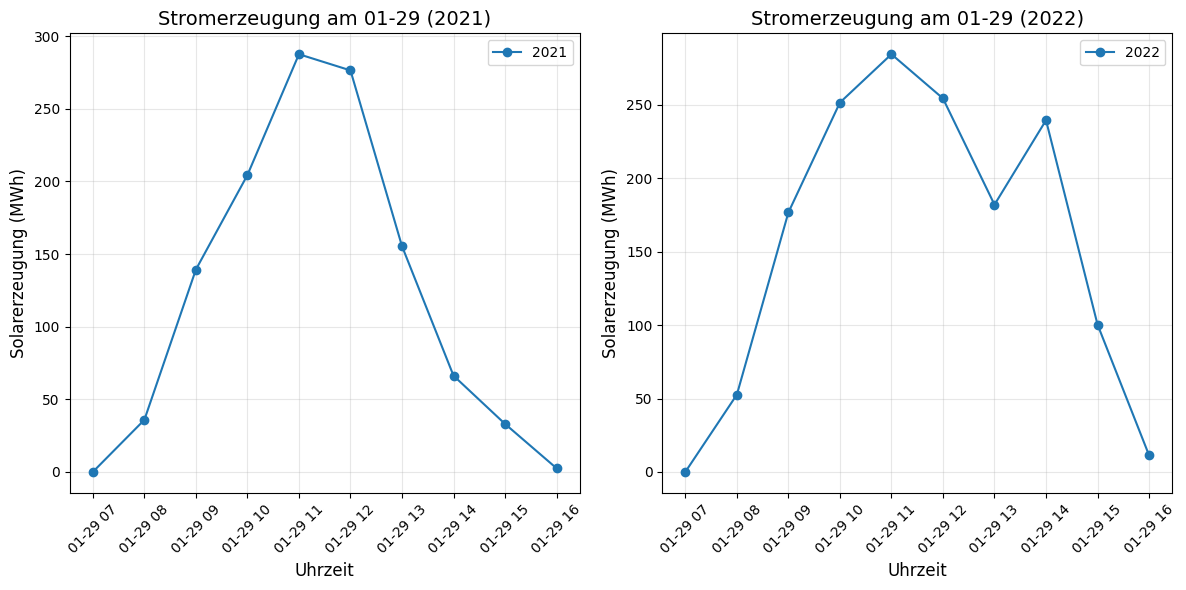

In [3]:
plot_solar_generation_by_date(df4, '01-29')

# Aufgabe 1.3

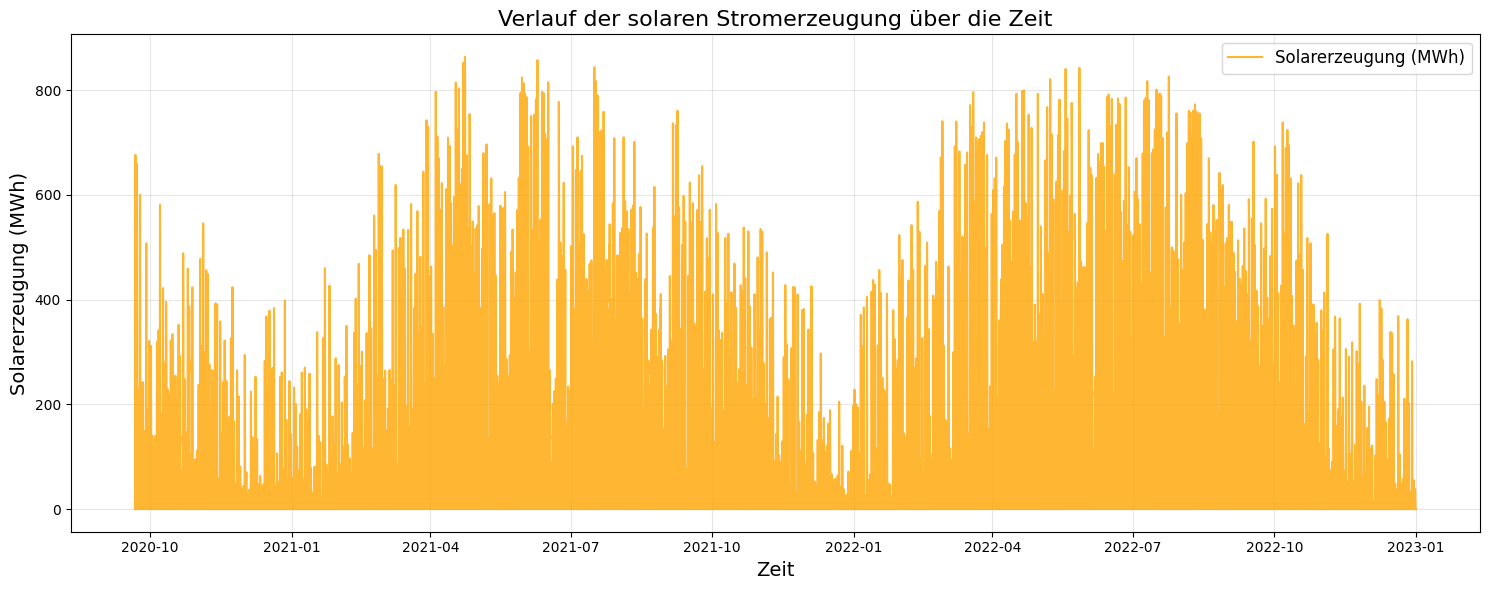

In [4]:
plot_solar_generation_over_time(df4)

/home/datata1/Documents/ml1-project/Analyse_Training/utils/plot_stromerzeugung.py:111: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_grouped = df.pivot_table(index='Season', columns='hour', values='Solar_MWh', aggfunc='mean')


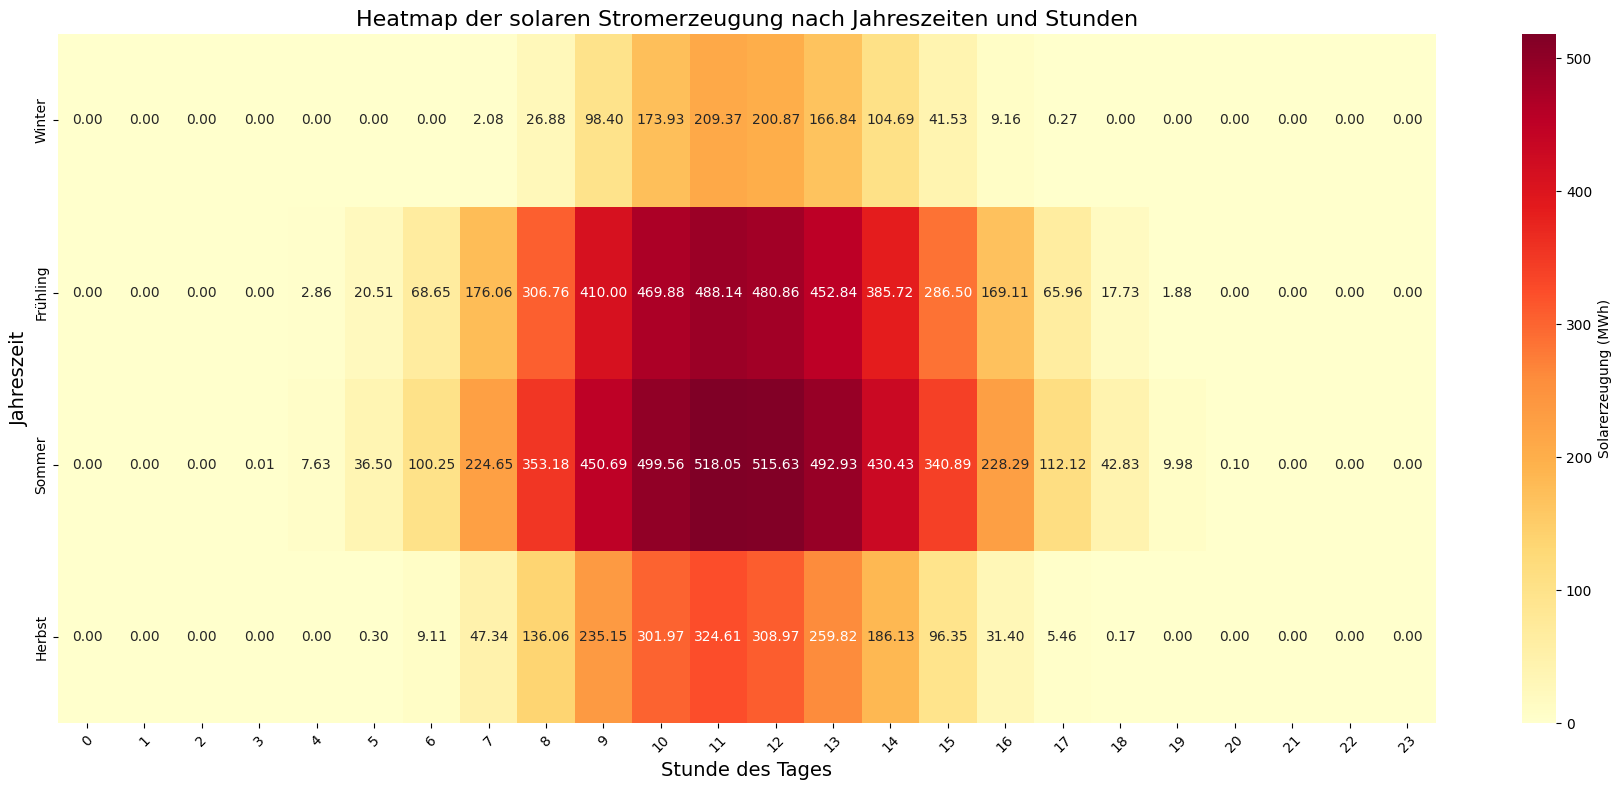

In [5]:
plot_solar_generation_seasonal_heatmap(df4)

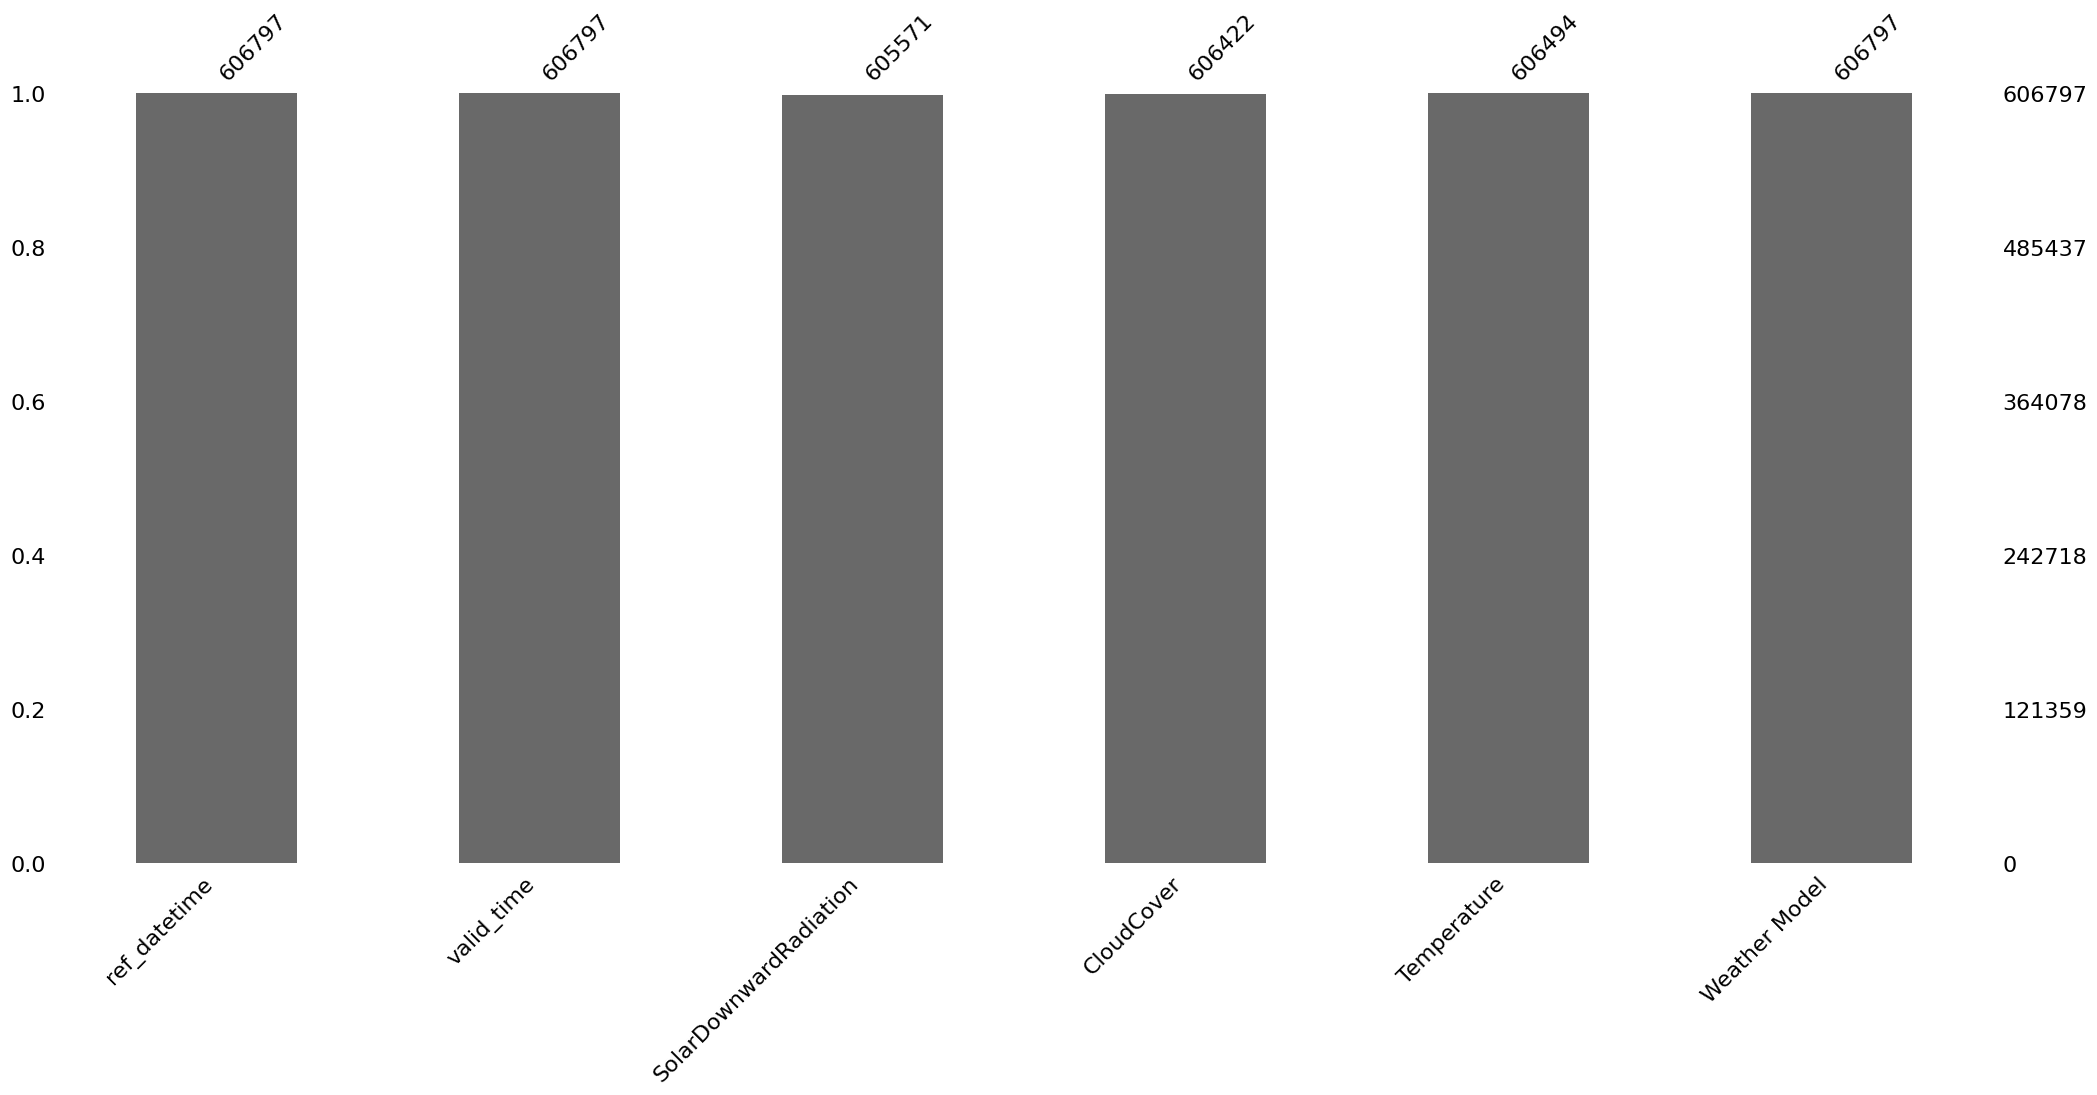

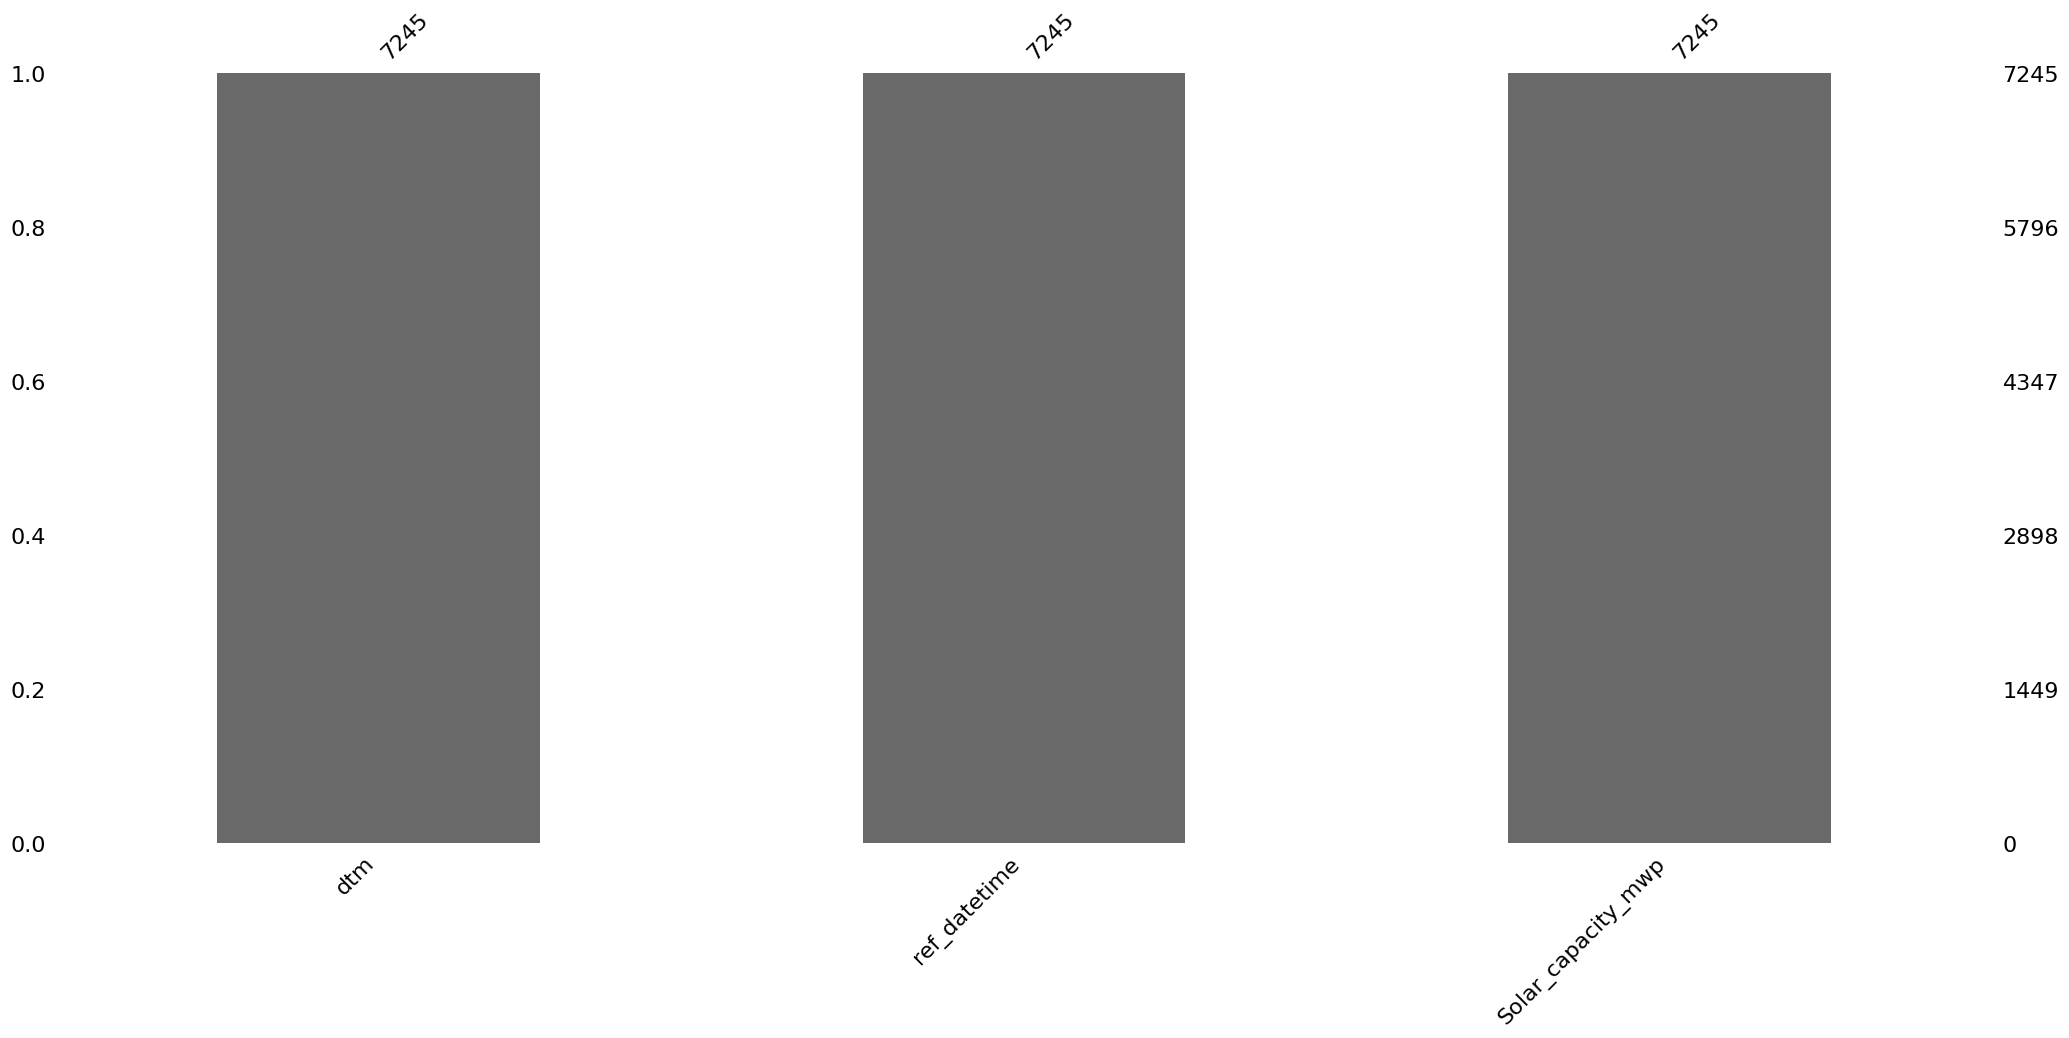

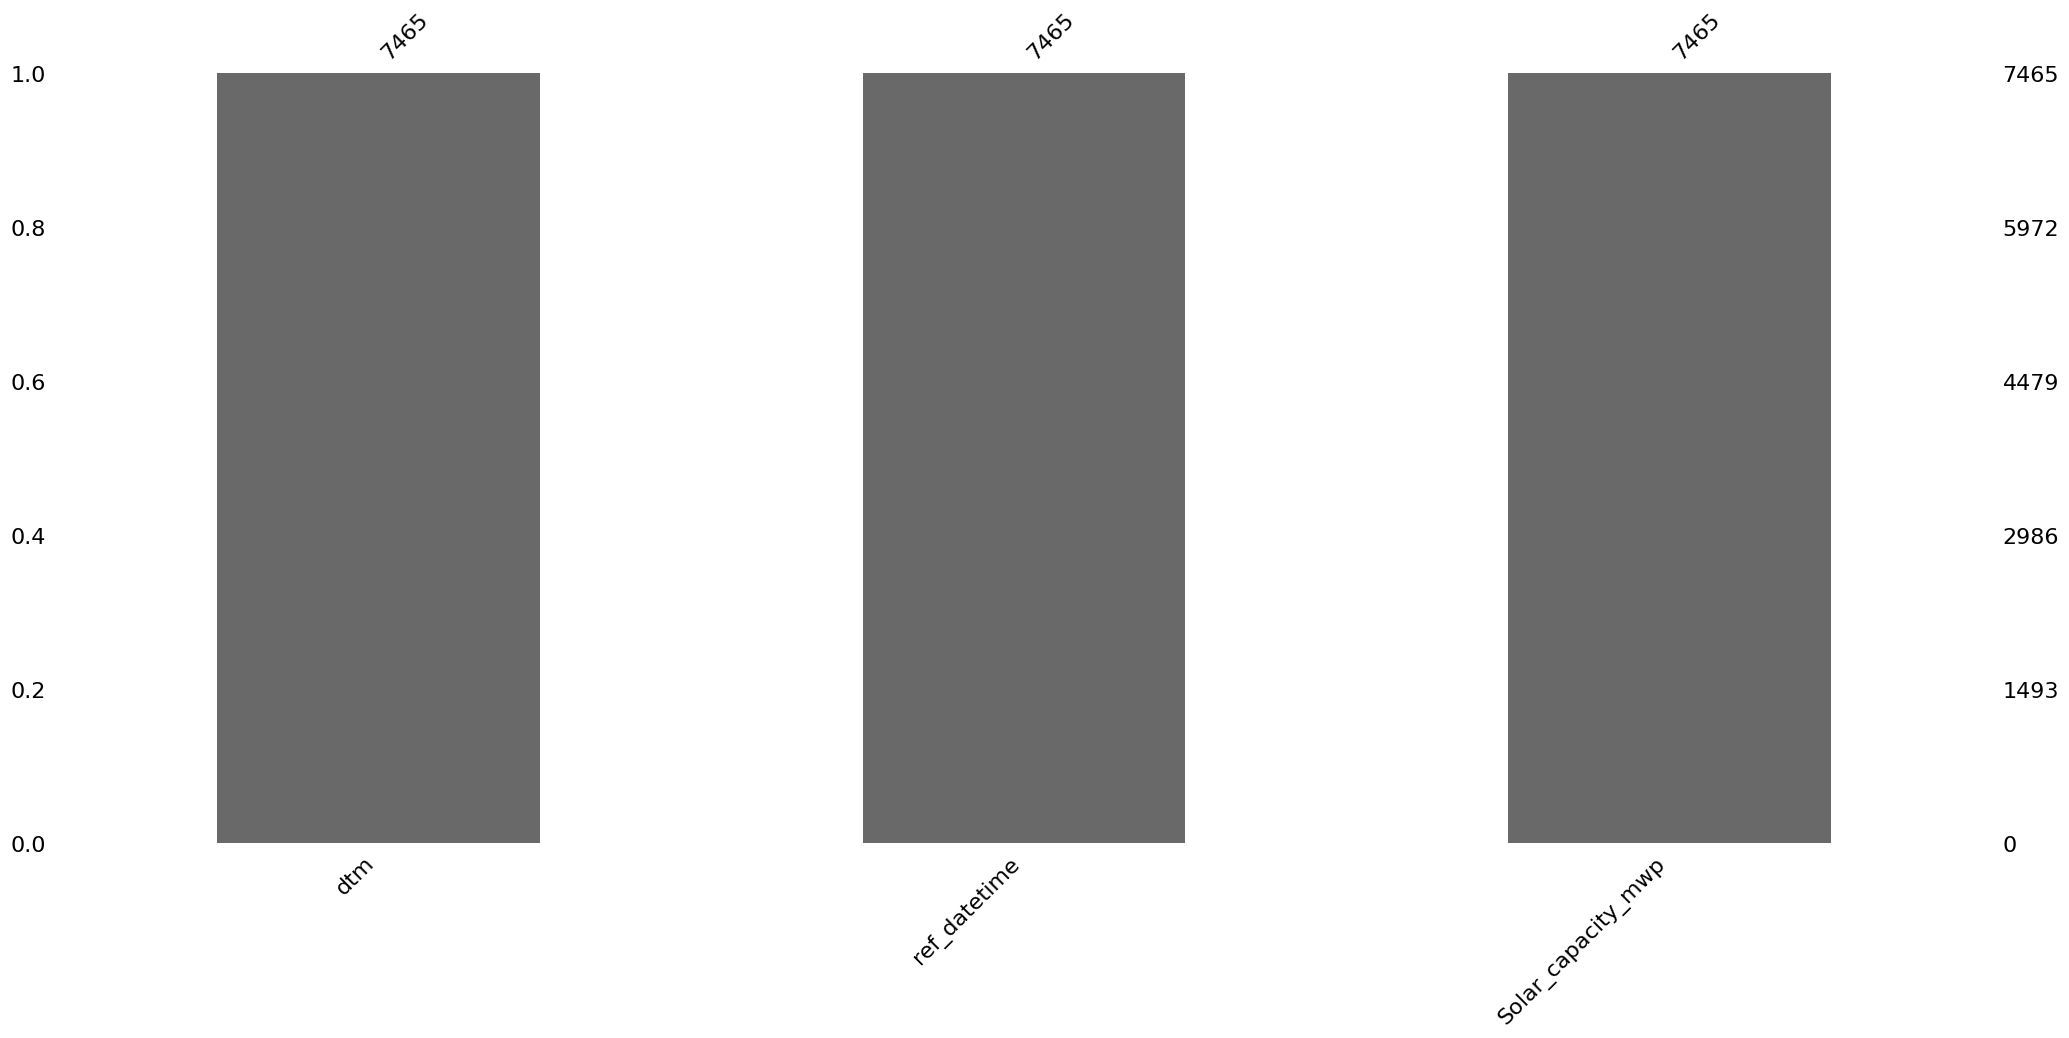

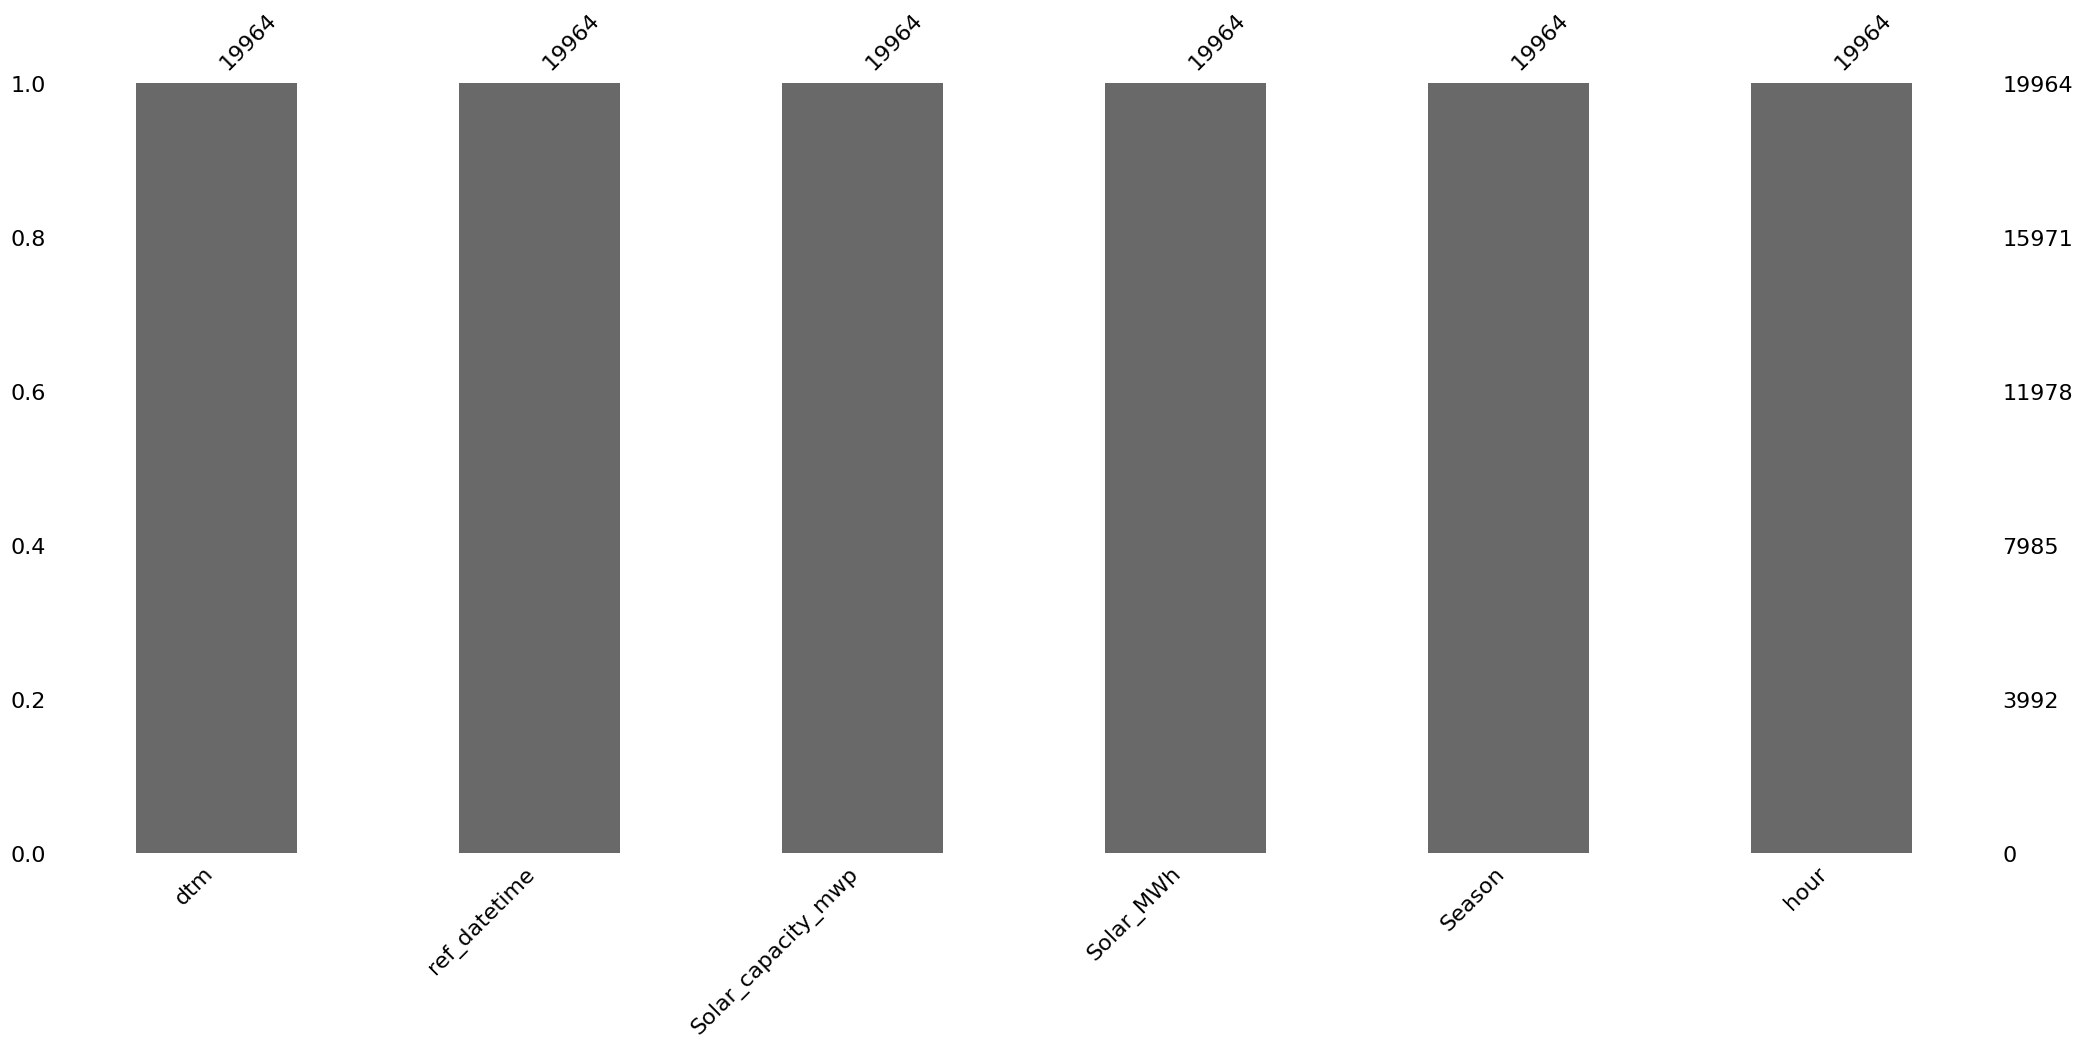

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# Ein Barplot der fehlenden Werte pro Spalte
msno.bar(df1)
plt.show()

msno.bar(df2)
plt.show()

msno.bar(df3)
plt.show()


msno.bar(df4)
plt.show()




notes: 

- probierte KNN imputer von sklearn um fehlende Werte einzusetzen (df1)
- Wenn alle drei Werte 
- bei df4 einfach den mittelwert imputen
- prüfen ob ein Wert von 0.0 in df4 richtig ist, oder auch wie null werte behandelt werden kann

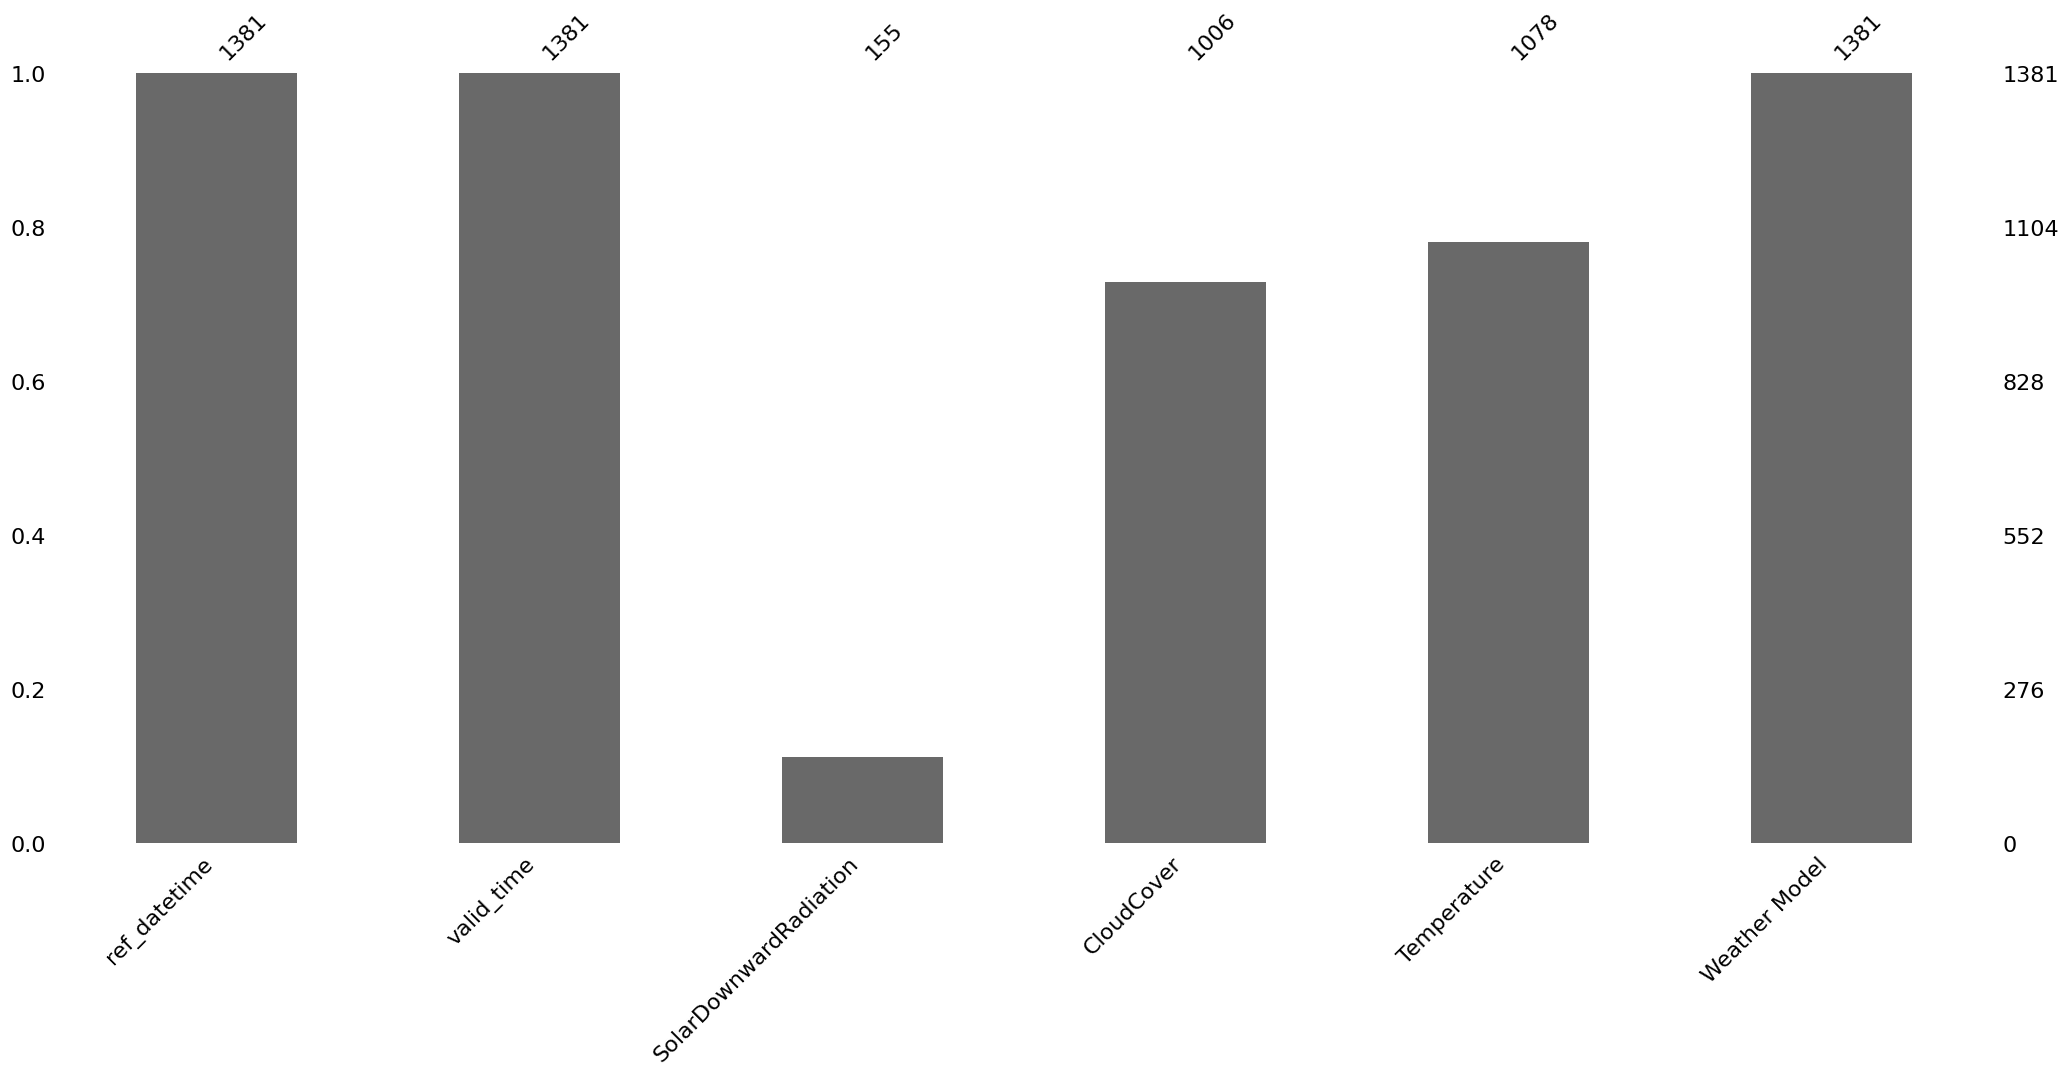

In [7]:
df1_mit_fehlenden_werten = df1[df1.isna().any(axis=1)]

msno.bar(df1_mit_fehlenden_werten)
plt.show()


In [8]:
# Zeilen mit mindestens einem fehlenden Wert filtern
df1_mit_fehlenden_werten = df1[df1.isna().any(axis=1)]

# Anzahl der Zeilen mit fehlenden Werten
anzahl_zeilen_mit_na = df1_mit_fehlenden_werten.shape[0]

# Ausgabe der Anzahl
print(f'Anzahl der Zeilen mit mindestens einem fehlenden Wert: {anzahl_zeilen_mit_na}')


Anzahl der Zeilen mit mindestens einem fehlenden Wert: 1381


In [9]:
# Anzahl der fehlenden Werte pro Zeile berechnen
anzahl_fehlende_werte_pro_zeile = df1.isna().sum(axis=1)

# Zeilen filtern, die in mindestens drei Spalten fehlende Werte haben
zeilen_mit_mindestens_drei_na = df1[anzahl_fehlende_werte_pro_zeile >= 3]

# Anzahl der Zeilen ermitteln
anzahl_zeilen_mit_drei_oder_mehr_na = zeilen_mit_mindestens_drei_na.shape[0]

# Ausgabe der Anzahl
print(f'Anzahl der Zeilen mit mindestens drei fehlenden Werten: {anzahl_zeilen_mit_drei_oder_mehr_na}')


Anzahl der Zeilen mit mindestens drei fehlenden Werten: 223


In [10]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Beispiel: DataFrame df1 (ist bereits definiert)

# 1. Zeilen entfernen, bei denen alle drei relevanten Spalten NaN sind
relevante_spalten = ['SolarDownwardRadiation', 'CloudCover', 'Temperature']
df1 = df1[~df1[relevante_spalten].isna().all(axis=1)]

# 2. Numerische Spalten identifizieren
numerische_spalten = df1.select_dtypes(include=['float64', 'int64']).columns

# 3. StandardScaler anwenden
scaler = StandardScaler()

# Numerische Spalten skalieren (kopiere die Daten für Skalierung)
df1_scaled = df1.copy()
df1_scaled[numerische_spalten] = scaler.fit_transform(df1[numerische_spalten])

# 4. KNN-Imputer initialisieren und anwenden
imputer = KNNImputer(n_neighbors=5)
df1_scaled[numerische_spalten] = imputer.fit_transform(df1_scaled[numerische_spalten])

# 5. Rückskalieren der imputierten Daten auf den ursprünglichen Wertebereich
df1[numerische_spalten] = scaler.inverse_transform(df1_scaled[numerische_spalten])

# Ergebnis anzeigen
print(df1.head())


               ref_datetime  valid_time  SolarDownwardRadiation  CloudCover  \
0 2020-09-20 00:00:00+00:00        20.0               -0.010547    0.366211   
1 2020-09-20 00:00:00+00:00        21.0                0.001263    0.471512   
2 2020-09-20 00:00:00+00:00        22.0                0.001532    0.398212   
3 2020-09-20 00:00:00+00:00        23.0               -0.001624    0.292247   
4 2020-09-20 00:00:00+00:00        24.0               -0.008356    0.327759   

   Temperature Weather Model  
0    13.823755      DWD ICON  
1    13.427564      DWD ICON  
2    13.093005      DWD ICON  
3    12.667871      DWD ICON  
4    12.216522      DWD ICON  


In [11]:
# Zeilen mit mindestens einem fehlenden Wert filtern
df1_mit_fehlenden_werten = df1[df1.isna().any(axis=1)]

# Anzahl der Zeilen mit fehlenden Werten
anzahl_zeilen_mit_na = df1_mit_fehlenden_werten.shape[0]

# Ausgabe der Anzahl
print(f'Anzahl der Zeilen mit mindestens einem fehlenden Wert: {anzahl_zeilen_mit_na}')


Anzahl der Zeilen mit mindestens einem fehlenden Wert: 0


# Aufgabe 2

# Aufgabe 2.1

Korrelationsmatrix:
                        Solar_capacity_mwp  Solar_MWh  SolarDownwardRadiation  \
Solar_capacity_mwp                1.000000   0.094251                0.091611   
Solar_MWh                         0.094251   1.000000                0.918157   
SolarDownwardRadiation            0.091611   0.918157                1.000000   
CloudCover                       -0.051733  -0.090304               -0.151707   
Temperature                       0.328873   0.423840                0.460636   
hour                              0.000770  -0.007862               -0.007896   

                        CloudCover  Temperature      hour  
Solar_capacity_mwp       -0.051733     0.328873  0.000770  
Solar_MWh                -0.090304     0.423840 -0.007862  
SolarDownwardRadiation   -0.151707     0.460636 -0.007896  
CloudCover                1.000000     0.076057 -0.014632  
Temperature               0.076057     1.000000  0.134074  
hour                     -0.014632     0.134074  1.0

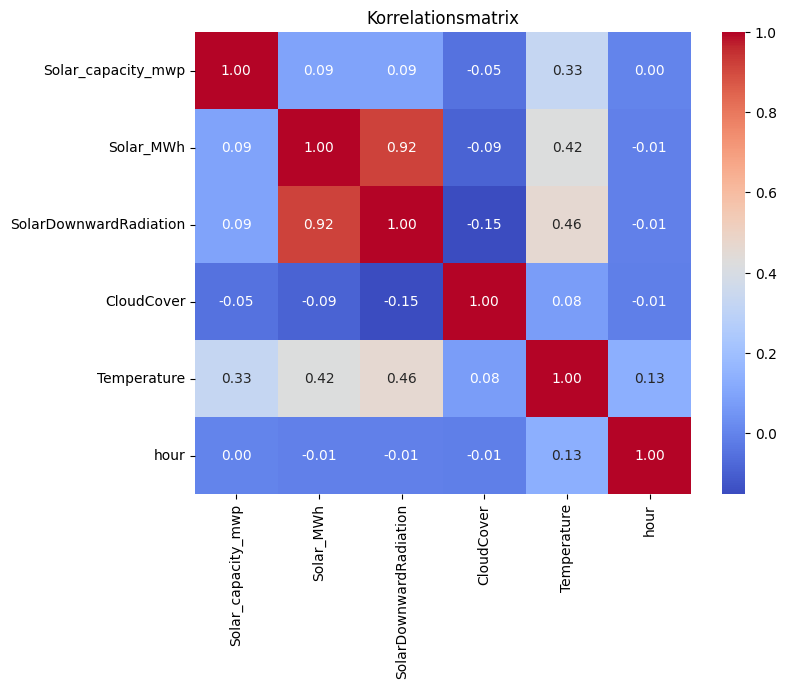

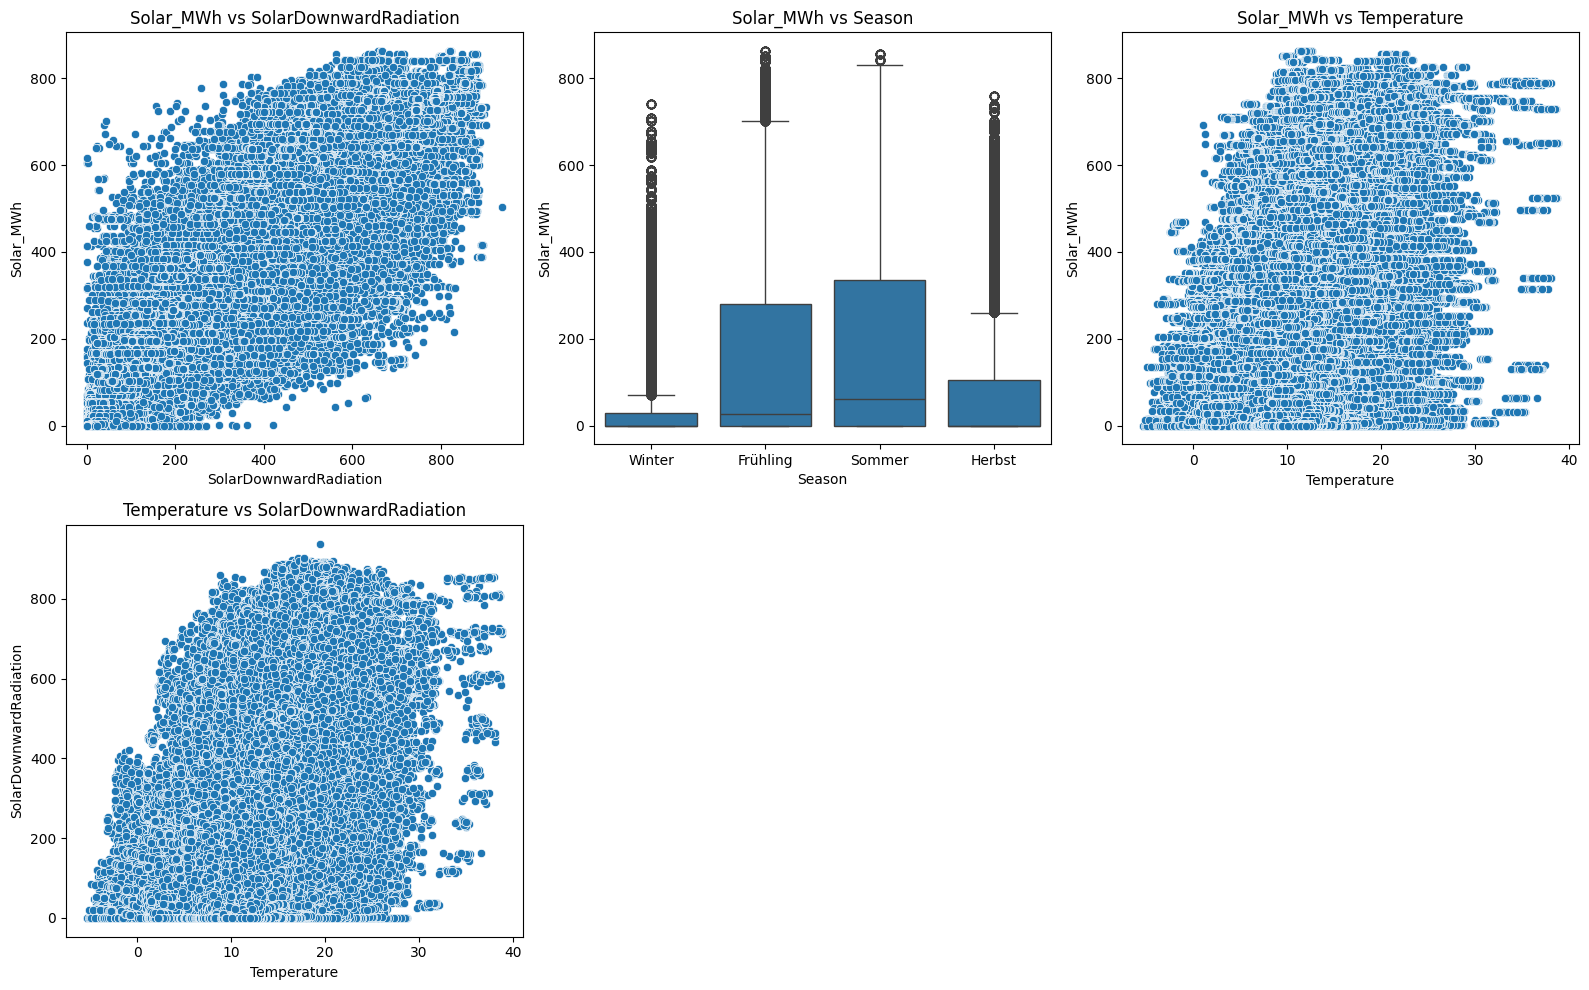

In [12]:
merged_df = merge_energy_and_forecast(df4, df1)

plot_attribute_vs_label_filtered(merged_df)


negativer Wert in SolarDownwardRadiation? Wie viele? Wie damit umgehen?

In [13]:
from sklearn.impute import KNNImputer
import pandas as pd

def apply_knn_imputer(merged_df, n_neighbors=5):
    # Auswahl der numerischen Spalten
    numeric_columns = ['Solar_MWh', 'hour', 
                       'SolarDownwardRadiation', 'CloudCover', 'Temperature']
    
    # Daten filtern und nur numerische Werte für den Imputer nutzen
    data_to_impute = merged_df[numeric_columns]
    
    # KNN-Imputer initialisieren
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    
    # Fehlende Werte ausfüllen
    imputed_data = knn_imputer.fit_transform(data_to_impute)
    
    # Die ersetzten Werte zurück in einen DataFrame konvertieren
    imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns, index=merged_df.index)
    
    # Neues DataFrame erstellen, das das Original kopiert und imputierte Werte enthält
    new_df = merged_df.copy()
    new_df[numeric_columns] = imputed_df
    
    return new_df

# Anwendung der Funktion auf deinen Datensatz
# merged_df = apply_knn_imputer(merged_df)

# Ausgabe zur Überprüfung
#print(imputed_df.describe())


In [14]:
merged_df.info()

# Why is Weather Model an object?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348899 entries, 0 to 348898
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   dtm                     348899 non-null  datetime64[ns, UTC]
 1   ref_datetime_x          348899 non-null  datetime64[ns, UTC]
 2   Solar_capacity_mwp      348899 non-null  float64            
 3   Solar_MWh               348899 non-null  float64            
 4   Season                  348899 non-null  category           
 5   hour                    348899 non-null  int32              
 6   ref_datetime_y          348899 non-null  datetime64[ns, UTC]
 7   valid_time              348899 non-null  float64            
 8   SolarDownwardRadiation  348899 non-null  float64            
 9   CloudCover              348899 non-null  float64            
 10  Temperature             348899 non-null  float64            
 11  Weather Model           34

In [15]:
merged_df.describe()

,Solar_capacity_mwp,Solar_MWh,hour,valid_time,SolarDownwardRadiation,CloudCover,Temperature
count,348899.000000,348899.000000,348899.000000,348899.000000,348899.000000,348899.000000,348899.000000
mean,2139.774183,111.476059,11.531383,45.987079,112.483117,0.638973,10.483201
std,68.641660,184.157186,6.923195,15.296890,179.886907,0.338345,5.947072
min,1863.496832,0.000000,0.000000,20.000000,-0.191098,0.000000,-5.365314
25%,2136.867137,0.000000,6.000000,33.000000,0.000000,0.361897,6.209543
50%,2147.429606,0.376623,12.000000,46.000000,3.000000,0.738655,10.225385
75%,2167.880720,158.161583,18.000000,59.000000,167.074498,0.956222,14.471147
max,2237.476835,863.223718,23.000000,72.000000,938.320996,1.000000,38.841179


Beispiele für neue Features 

hour_category: Morgen, Mittag, Abend, Nacht.
adjusted_radiation: SolarDownwardRadiation * (1 - CloudCover).
adjusted_temperature: Temperature / (1 + CloudCover)


In [16]:

# 1. Monat aus der Spalte 'dtm' extrahieren
merged_df['month'] = merged_df['dtm'].dt.strftime('%B')

# 2. hour_category basierend auf der Spalte 'hour' definieren
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morgen'
    elif 12 <= hour < 18:
        return 'Mittag'
    elif 18 <= hour < 24:
        return 'Abend'
    else:
        return 'Nacht'

merged_df['hour_category'] = merged_df['hour'].apply(categorize_hour)
merged_df['hour_category'] = merged_df['hour_category'].astype('category')


# 3. adjusted_radiation berechnen
merged_df['adjusted_radiation'] = merged_df['SolarDownwardRadiation'] * (1 - merged_df['CloudCover'])

# 4. adjusted_temperature berechnen
merged_df['adjusted_temperature'] = merged_df['Temperature'] / (1 + merged_df['CloudCover'])

# Ergebnis prüfen
print(merged_df.head())


                        dtm            ref_datetime_x  Solar_capacity_mwp  \
0 2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
1 2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
2 2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
3 2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
4 2020-09-21 02:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   

   Solar_MWh  Season  hour            ref_datetime_y  valid_time  \
0        0.0  Herbst     0 2020-09-20 00:00:00+00:00        24.0   
1        0.0  Herbst     0 2020-09-20 00:00:00+00:00        24.0   
2        0.0  Herbst     1 2020-09-20 00:00:00+00:00        25.0   
3        0.0  Herbst     1 2020-09-20 00:00:00+00:00        25.0   
4        0.0  Herbst     2 2020-09-20 00:00:00+00:00        26.0   

   SolarDownwardRadiation  CloudCover  Temperature Weather Model  \
0               -0.008356    0.327759    12.216522      DWD 

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348899 entries, 0 to 348898
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   dtm                     348899 non-null  datetime64[ns, UTC]
 1   ref_datetime_x          348899 non-null  datetime64[ns, UTC]
 2   Solar_capacity_mwp      348899 non-null  float64            
 3   Solar_MWh               348899 non-null  float64            
 4   Season                  348899 non-null  category           
 5   hour                    348899 non-null  int32              
 6   ref_datetime_y          348899 non-null  datetime64[ns, UTC]
 7   valid_time              348899 non-null  float64            
 8   SolarDownwardRadiation  348899 non-null  float64            
 9   CloudCover              348899 non-null  float64            
 10  Temperature             348899 non-null  float64            
 11  Weather Model           34

In [62]:
from sklearn.model_selection import GroupKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from IPython.display import Markdown

# Zielvariable und Features definieren
y = merged_df['Solar_MWh']
X = merged_df.drop(columns=['Solar_MWh', 'hour', 'Temperature', 'adjusted_radiation'])

# Kategorische und numerische Spalten identifizieren
kategorische_spalten = ['hour_category', 'month', 'Season',  'Weather Model']
numerische_spalten = [  
                         'Solar_capacity_mwp', 'SolarDownwardRadiation',  'valid_time',  'CloudCover', 'adjusted_temperature',
                      ]

# Preprocessing: One-Hot-Encoding und Skalierung
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerische_spalten),  # Skalierung der numerischen Daten
        ('cat', OneHotEncoder(drop='first'), kategorische_spalten)  # One-Hot-Encoding der kategorischen Daten
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())  
])

# Parameterbereich für die inneren GridSearchCV (z.B. Alpha-Werte)
param_grid = {'model__alpha': np.linspace(10, 120, 50)}  

# Verwenden von GroupKFold anstelle von KFold
outer_gkf = GroupKFold(n_splits=5)

# Liste zum Speichern der Fehler und der besten Alpha-Werte
test_errors = []  
alpha_performance = {} 

# Outer loop - Über die äußeren Folds iterieren
for outer_fold, (train_indices, test_indices) in enumerate(outer_gkf.split(X, y, groups=merged_df['dtm'])):
    print(f"Outer Fold {outer_fold + 1}:")
    print("-------")
    
    # Split der Daten in Trainings- und Testset für den äußeren Fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Inner GroupKFold für GridSearchCV
    inner_gkf = GroupKFold(n_splits=5)  # Inneres Cross-Validation für GridSearch
    
    # GridSearchCV für die Auswahl des besten Alpha-Werts
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=inner_gkf, 
                               scoring='neg_root_mean_squared_error', n_jobs=-1)
    
    # Fit auf den Trainingsdaten des äußeren Folds
    grid_search.fit(X_train, y_train, groups=merged_df['dtm'].iloc[train_indices])  # Gruppen angeben
    
    # Der beste Alpha-Wert aus GridSearch
    best_alpha = grid_search.best_params_['model__alpha']
    print(f"  Best Alpha from GridSearch: {best_alpha}")
    
    if best_alpha not in alpha_performance:
        alpha_performance[best_alpha] = []
    
    y_test_pred = grid_search.predict(X_test)
    
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_errors.append(test_error)
    alpha_performance[best_alpha].append(test_error)  # Fehler für das aktuelle Alpha speichern
    print(f"  Test RMSE for Outer Fold {outer_fold + 1}: {test_error:.2f}")

# Bestes Alpha basierend auf der Performance in den äußeren Folds auswählen
best_alpha_overall = min(alpha_performance, key=lambda k: np.mean(alpha_performance[k]))
print(f"\nBest Alpha across all Outer Folds: {best_alpha_overall}")

# Endgültige Modellanpassung und Evaluation
# Kein erneutes Splitten notwendig, da du das finale Modell auf den gesamten Datensatz trainierst

# Trainiere das Modell auf dem gesamten Datensatz mit dem besten Alpha-Wert
pipeline.set_params(model__alpha=best_alpha_overall)
pipeline.fit(X, y)  # Trainiere das Modell auf dem gesamten Datensatz

# Vorhersagen für Trainings- und Testdaten
y_train_pred = pipeline.predict(X)  # Vorhersage auf dem gesamten Trainingsdatensatz
y_test_pred = pipeline.predict(X_test)  # Vorhersage auf den Testdaten

# Berechnung von MSE und R2 für die finale Evaluierung
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Kategorische Feature-Namen und alle Feature-Namen (numerische + kategorische)
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(kategorische_spalten)
all_feature_names = numerische_spalten + list(cat_feature_names)

# Ausgabe des Evaluierungsberichts
evaluation_report = print_evaluation(
    model=pipeline.named_steps['model'],  
    X_train=X,  # Verwende den gesamten Datensatz für das Training
    X_test=X_test, 
    y_train=y,  # Zielvariable auf dem gesamten Datensatz
    y_test=y_test, 
    y_train_pred=y_train_pred, 
    y_test_pred=y_test_pred, 
    alpha=best_alpha_overall, 
    feature_names=all_feature_names
)

# Ausgabe des Bewertungsberichts als Markdown
display(Markdown(evaluation_report))



Outer Fold 1:
-------
  Best Alpha from GridSearch: 120.0
  Test RMSE for Outer Fold 1: 72.06
Outer Fold 2:
-------
  Best Alpha from GridSearch: 95.30612244897958
  Test RMSE for Outer Fold 2: 70.28
Outer Fold 3:
-------
  Best Alpha from GridSearch: 86.3265306122449
  Test RMSE for Outer Fold 3: 69.51
Outer Fold 4:
-------
  Best Alpha from GridSearch: 84.08163265306122
  Test RMSE for Outer Fold 4: 70.87
Outer Fold 5:
-------
  Best Alpha from GridSearch: 108.77551020408163
  Test RMSE for Outer Fold 5: 69.22

Best Alpha across all Outer Folds: 108.77551020408163


### Ridge(alpha=np.float64(108.77551020408163)) Evaluation

| Dataset | R² | RMSE | MAE | Rows | Columns |
|---------|--------:|------------:|--------:|-------:|-------:|
| Train   | 0.85397 | 70.37 | 42.39 | 348899 | 13 |
| Test    | 0.85670 | 69.19 | 42.01 | 69779 | 13 |

### Top 10 Coefficients

| Feature Name           |   Coefficient |
|:-----------------------|--------------:|
| SolarDownwardRadiation |     166.567   |
| Weather Model_NCEP GFS |     -23.5406  |
| hour_category_Morgen   |      20.9148  |
| hour_category_Mittag   |      15.7641  |
| Season_Sommer          |     -13.9414  |
| month_May              |     -13.8626  |
| month_December         |     -11.6883  |
| month_February         |       8.26084 |
| month_June             |      -7.243   |
| month_January          |       6.83902 |

Number of coefficients that are zero: 0/23


Alpha value: 108.77551020408163


In [34]:
# merge forcasts in die test datensätze

merged_df_test1 = merge_energy_and_forecast(df2, df1)
merged_df_test2 = merge_energy_and_forecast(df3, df1)


In [35]:

# 1. Monat aus der Spalte 'dtm' extrahieren
merged_df_test1['month'] = merged_df_test1['dtm'].dt.strftime('%B')
merged_df_test1['hour'] = merged_df_test1['dtm'].dt.hour


# 2. hour_category basierend auf der Spalte 'hour' definieren
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morgen'
    elif 12 <= hour < 18:
        return 'Mittag'
    elif 18 <= hour < 24:
        return 'Abend'
    else:
        return 'Nacht'

merged_df_test1['hour_category'] = merged_df_test1['hour'].apply(categorize_hour)
merged_df_test1['hour_category'] = merged_df_test1['hour_category'].astype('category')


# 3. adjusted_radiation berechnen
merged_df_test1['adjusted_radiation'] = merged_df_test1['SolarDownwardRadiation'] * (1 - merged_df_test1['CloudCover'])

# 4. adjusted_temperature berechnen
merged_df_test1['adjusted_temperature'] = merged_df_test1['Temperature'] / (1 + merged_df_test1['CloudCover'])

merged_df_test1.drop(columns=['hour'])

# Ergebnis prüfen
print(merged_df_test1.head())


                        dtm            ref_datetime_x  Solar_capacity_mwp  \
0 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
1 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
2 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
3 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
4 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   

             ref_datetime_y  valid_time  SolarDownwardRadiation  CloudCover  \
0 2022-12-29 00:00:00+00:00        72.0              158.671694    1.000000   
1 2022-12-29 06:00:00+00:00        66.0                0.045703    1.000000   
2 2022-12-29 12:00:00+00:00        60.0                0.013672    0.999979   
3 2022-12-29 18:00:00+00:00        54.0                0.021289    1.000000   
4 2022-12-30 00:00:00+00:00        48.0                0.031055    1.000000   

   Temperature Weather Model            valid_datetime    mont

In [36]:

# 1. Monat aus der Spalte 'dtm' extrahieren
merged_df_test2['month'] = merged_df_test2['dtm'].dt.strftime('%B')
merged_df_test2['hour'] = merged_df_test2['dtm'].dt.hour


# 2. hour_category basierend auf der Spalte 'hour' definieren
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morgen'
    elif 12 <= hour < 18:
        return 'Mittag'
    elif 18 <= hour < 24:
        return 'Abend'
    else:
        return 'Nacht'

merged_df_test2['hour_category'] = merged_df_test2['hour'].apply(categorize_hour)
merged_df_test2['hour_category'] = merged_df_test2['hour_category'].astype('category')


# 3. adjusted_radiation berechnen
merged_df_test2['adjusted_radiation'] = merged_df_test2['SolarDownwardRadiation'] * (1 - merged_df_test2['CloudCover'])

# 4. adjusted_temperature berechnen
merged_df_test2['adjusted_temperature'] = merged_df_test2['Temperature'] / (1 + merged_df_test2['CloudCover'])

merged_df_test2.drop(columns=['hour'])


# Ergebnis prüfen
print(merged_df_test2.head())


                        dtm            ref_datetime_x  Solar_capacity_mwp  \
0 2023-10-31 01:00:00+00:00 2023-10-30 00:00:00+00:00         2452.922019   
1 2023-10-31 01:00:00+00:00 2023-10-30 00:00:00+00:00         2452.922019   
2 2023-10-31 01:00:00+00:00 2023-10-30 00:00:00+00:00         2452.922019   
3 2023-10-31 01:00:00+00:00 2023-10-30 00:00:00+00:00         2452.922019   
4 2023-10-31 01:00:00+00:00 2023-10-30 00:00:00+00:00         2452.922019   

             ref_datetime_y  valid_time  SolarDownwardRadiation  CloudCover  \
0 2023-10-28 06:00:00+00:00        67.0               -0.004769    0.469926   
1 2023-10-28 12:00:00+00:00        61.0                0.013818    0.576840   
2 2023-10-28 18:00:00+00:00        55.0               -0.014798    0.736107   
3 2023-10-29 00:00:00+00:00        49.0               -0.004998    0.815327   
4 2023-10-29 06:00:00+00:00        43.0                0.005001    0.786246   

   Temperature Weather Model            valid_datetime    mont

In [37]:
# Preprocessing der neuen Testdaten (z. B. Skalierung und One-Hot-Encoding)
#X_new_1 = merged_df_test1.drop(columns=['hour'])  # Stelle sicher, dass du 'Solar_MWh' und 'hour' entfernst
#X_new_2 = merged_df_test2.drop(columns=['hour'])  # Wenn die Daten diese Spalten haben

# Apply the same preprocessing to the new data
X_new_1_processed = pipeline.named_steps['preprocessor'].transform(merged_df_test1)
X_new_2_processed = pipeline.named_steps['preprocessor'].transform(merged_df_test2)


In [38]:
# Vorhersagen für die neuen Daten
y_new_pred_1 = pipeline.named_steps['model'].predict(X_new_1_processed)
y_new_pred_2 = pipeline.named_steps['model'].predict(X_new_2_processed)


In [39]:
# Überprüfen der Längen
print("Anzahl der Zeilen in merged_df_test2:", len(merged_df_test2))
print("Anzahl der Vorhersagen (y_new_pred_2):", len(y_new_pred_2))


Anzahl der Zeilen in merged_df_test2: 125530
Anzahl der Vorhersagen (y_new_pred_2): 125530


In [40]:
# Annahme: merged_df_test1 und merged_df_test2 existieren bereits, und y_new_pred_1, y_new_pred_2 sind die Vorhersagen

# Vorhersagen für merged_df_test1 hinzufügen
merged_df_test1['Solar_MWh_pred'] = y_new_pred_1

# Vorhersagen für merged_df_test2 hinzufügen
merged_df_test2['Solar_MWh_pred'] = y_new_pred_2

# Ergebnis prüfen
print(merged_df_test1.head())  # Zeigt merged_df_test1 mit der neuen Vorhersagespalte
print(merged_df_test2.head())  # Zeigt merged_df_test2 mit der neuen Vorhersagespalte

# Speichern der DataFrames mit den Vorhersagen als .pkl-Dateien
merged_df_test1.to_pickle('energy_test1.pkl')
merged_df_test2.to_pickle('energy_test2.pkl')

                        dtm            ref_datetime_x  Solar_capacity_mwp  \
0 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
1 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
2 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
3 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
4 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   

             ref_datetime_y  valid_time  SolarDownwardRadiation  CloudCover  \
0 2022-12-29 00:00:00+00:00        72.0              158.671694    1.000000   
1 2022-12-29 06:00:00+00:00        66.0                0.045703    1.000000   
2 2022-12-29 12:00:00+00:00        60.0                0.013672    0.999979   
3 2022-12-29 18:00:00+00:00        54.0                0.021289    1.000000   
4 2022-12-30 00:00:00+00:00        48.0                0.031055    1.000000   

   Temperature Weather Model            valid_datetime    mont